PPT LINK: https://1drv.ms/p/s!AtwEimPMZ-VHnUzUoEfg5dJmkTRR?e=becXfr

In [ ]:
wine_df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sns

In [ ]:
# Importing Train Test Split
from sklearn.model_selection import train_test_split
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Importing K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
# Importing K Means Clustering
from sklearn.cluster import KMeans
# Importing XG Boost Classifier and Regressor
from xgboost import XGBClassifier, XGBRegressor
# Importing SVC
from sklearn.svm import SVC
# Importing Accuracy Score, Precision Score, Recall Score, F1 Score, Roc Auc Score, Confusion Matrix, and Classification Report
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:

# Change 'quality' column values to 1 or 0 based on a condition (e.g., > 5)
threshold = 6
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x > threshold else 0)
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Replacing 5 with 0 and 6 with 1 in the specified column
wine_df['quality'].replace({5: 0, 6: 1}, inplace=True)

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Count the occurrences of 0s and 1s in the column
count_0s = wine_df['quality'].value_counts().get(0, 0)  # Count of 0s
count_1s = wine_df['quality'].value_counts().get(1, 0)  # Count of 1s

# Check if counts are equal
if count_0s == count_1s:
    print("The column has an equal number of 0s and 1s.")
else:
    print("The column does not have an equal number of 0s and 1s.")


The column does not have an equal number of 0s and 1s.


In [ ]:

if count_0s > count_1s:
    # Add 1s to balance
    extra_1s_count = count_0s - count_1s
    extra_1s = np.ones(extra_1s_count)
    df = wine_df.append(pd.DataFrame({'quality': extra_1s}))

elif count_1s > count_0s:
    # Add 0s to balance
    extra_0s_count = count_1s - count_0s
    extra_0s = np.zeros(extra_0s_count)
    df = wine_df.append(pd.DataFrame({'quality': extra_0s}))

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1160            NaN               NaN          NaN             NaN        NaN   
1161            NaN               NaN          NaN             NaN        NaN   
1162            NaN               NaN          NaN             NaN        NaN   
1163            NaN               NaN          NaN             NaN        NaN   
1164            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

<ipython-input-190-51dc8ea9faa5>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = wine_df.append(pd.DataFrame({'quality': extra_1s}))


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
# Dropping the Duplicate Values
df = wine_df.drop_duplicates()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Finding all the Unique value in the Data Set
wine_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   2
dtype: int64

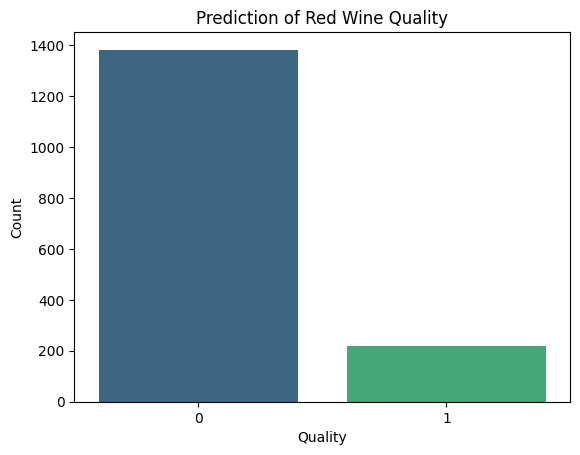

In [ ]:
sns.countplot(x='quality', data=wine_df, palette='viridis')
plt.title('Prediction of Red Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

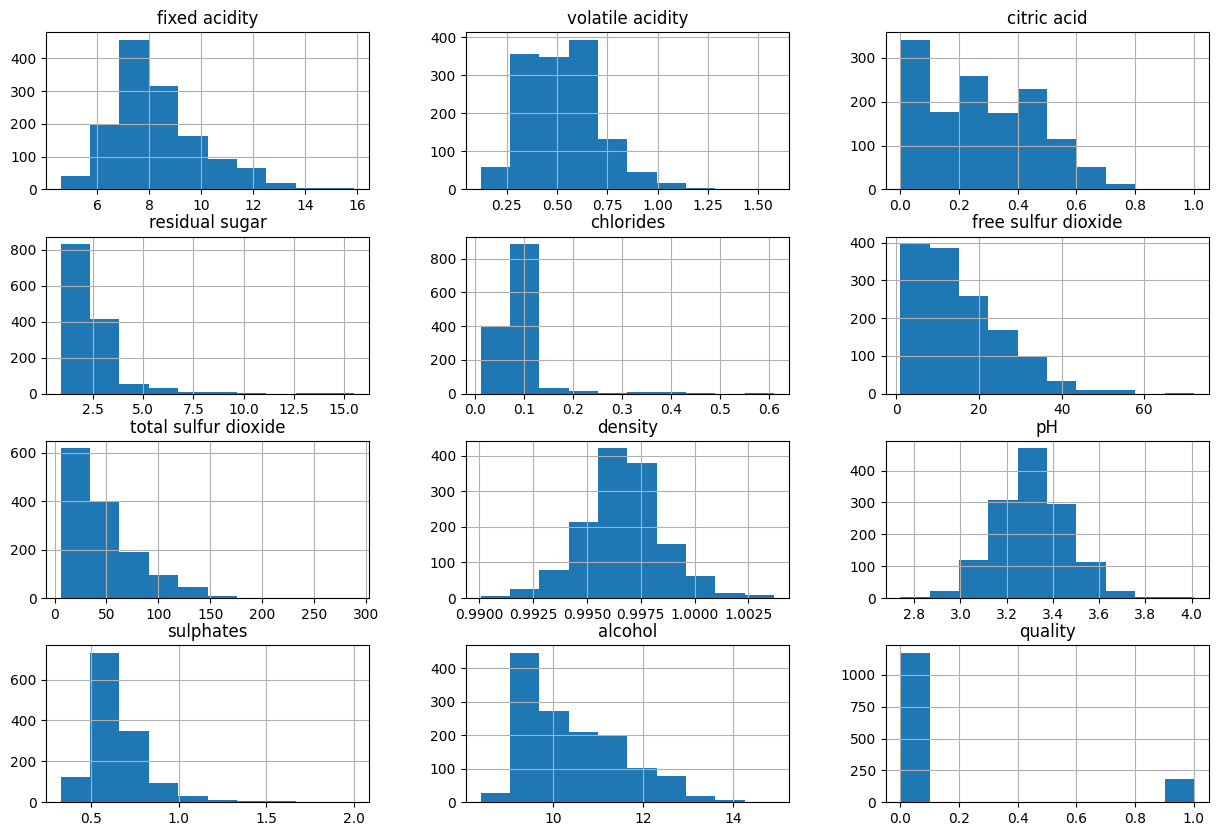

In [ ]:
# Plotting histograms for all features
df.hist(bins=10, figsize=(15, 10))
plt.show()


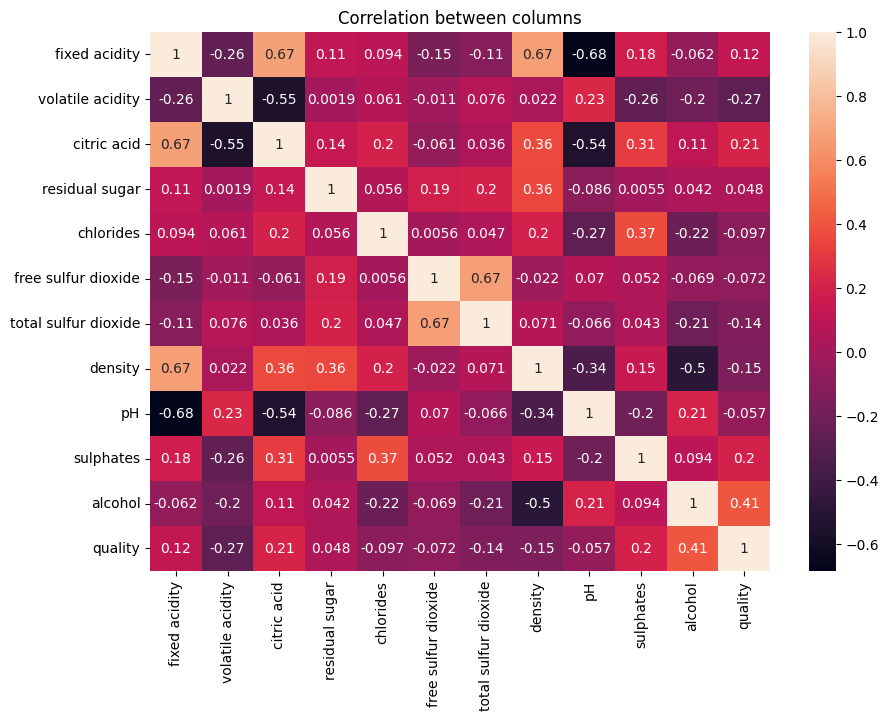

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

In [ ]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

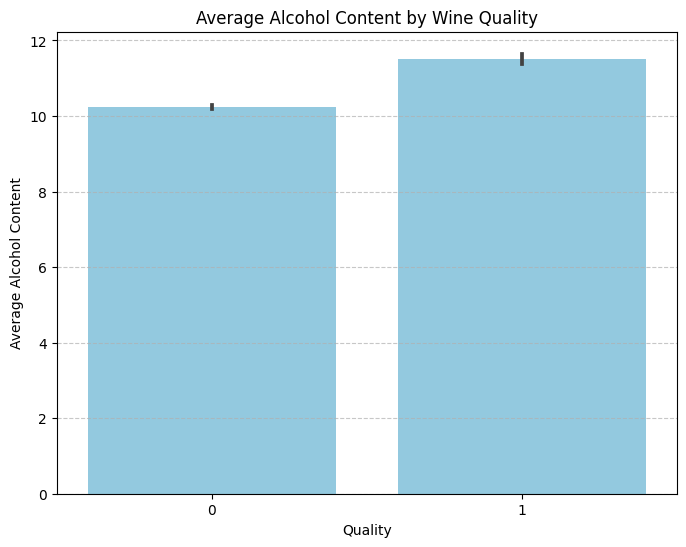

In [ ]:
# Create a bar plot to check quality based on alcohol content
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='alcohol', data=wine_df, color='skyblue')
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [ ]:
# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1279, 11)
y_train (1279,)
X_test (320, 11)
y_test (320,)


# **DECISION TREE CLASSIFIER**

In [ ]:
# Creating and training the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = decision_tree.predict(X_test)

Confusion Matrix:
[[255  18]
 [ 23  24]]


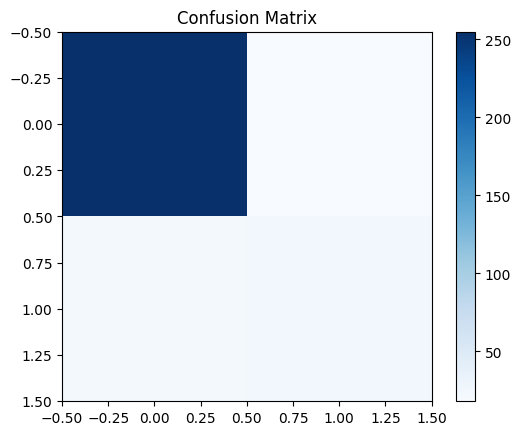

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Classification Report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.871875


# **RANDOM FOREST CLASSIFIER **

In [ ]:
# Creating and training the Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = random_forest.predict(X_test)

Confusion Matrix:
[[264   9]
 [ 23  24]]


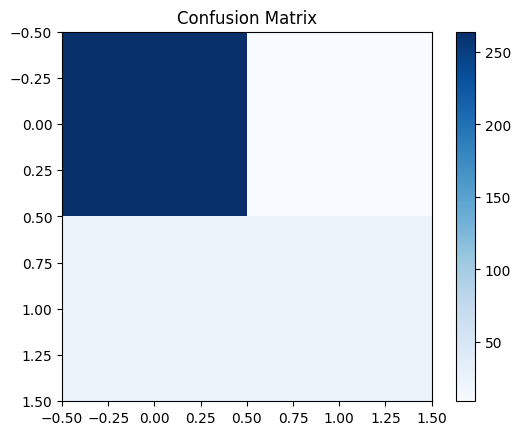

In [ ]:
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Generating a classification report
cls_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cls_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


Accuracy: 0.9


# **Logistic regression**

In [ ]:
# Creating and training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

# Making predictions on the test set
y_pred = log_reg.predict(X_test)


Confusion Matrix:
[[267   6]
 [ 37  10]]


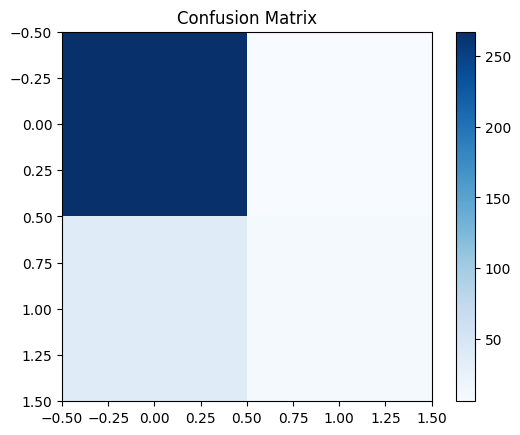

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Classification Report
cls_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cls_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


Accuracy: 0.865625


# **KNN **

In [ ]:
# Creating and training the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions on the test set
y_pred = knn.predict(X_test)


Confusion Matrix:
[[264   9]
 [ 37  10]]


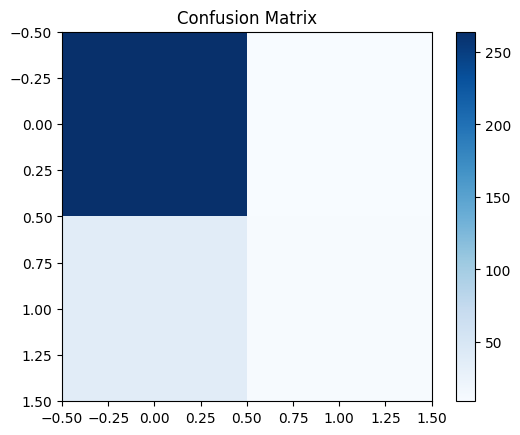

In [ ]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Classification Report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



In [ ]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.85625


# **Kmeans**

In [ ]:
# Classification Report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



Confusion Matrix:
[[264   9]
 [ 37  10]]


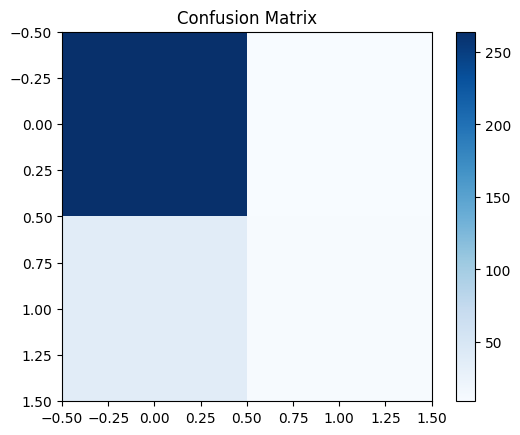

In [ ]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85625


# **XG BOOSTING**

In [ ]:
# Creating and training the XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Making predictions on the test set
y_pred = xgb.predict(X_test)

In [ ]:
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

Confusion Matrix:
[[264   9]
 [ 18  29]]


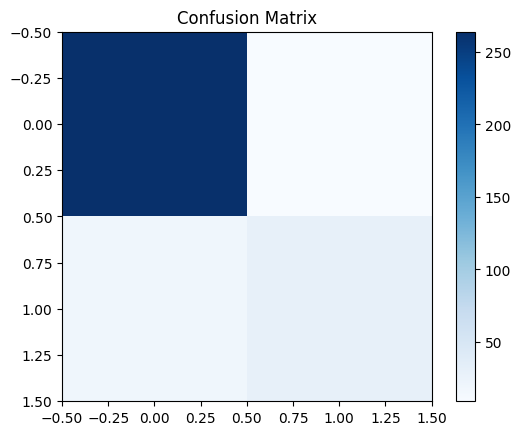

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
print("\nClassification Report:")
print(cls_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       273
           1       0.76      0.62      0.68        47

    accuracy                           0.92       320
   macro avg       0.85      0.79      0.82       320
weighted avg       0.91      0.92      0.91       320



In [ ]:

print(f"Accuracy: {accuracy}")

Accuracy: 0.915625


# **ADA BOOST **

In [ ]:
# Creating an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [ ]:
# Training the AdaBoost classifier
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
predictions = adaboost.predict(X_test)


In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.84375


Confusion Matrix:
[[255  18]
 [ 32  15]]


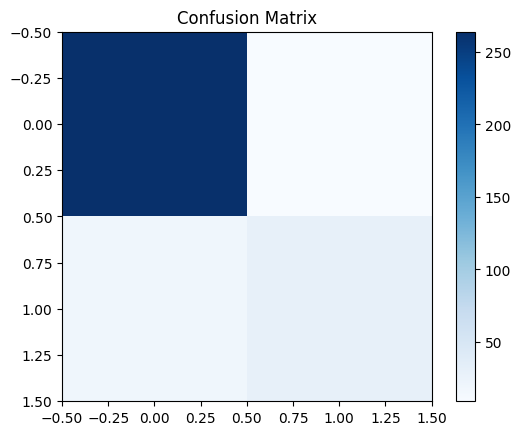

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{cm}")
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Classification Report
cls_report = classification_report(y_test, predictions)
print(f"Classification Report:\n{cls_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       273
           1       0.45      0.32      0.38        47

    accuracy                           0.84       320
   macro avg       0.67      0.63      0.64       320
weighted avg       0.82      0.84      0.83       320



# **SVC**

In [ ]:
# Creating and training the Support Vector Classifier (SVC) model
svc = SVC()
svc.fit(X_train, y_train)


SVC()

In [ ]:
# Making predictions on the test set
y_pred = svc.predict(X_test)


Confusion Matrix:
[[273   0]
 [ 46   1]]


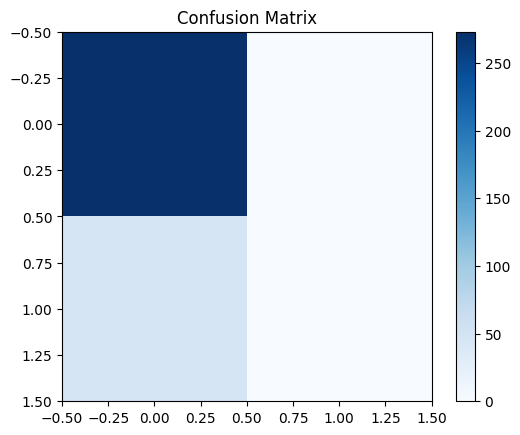

In [ ]:
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot a confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

In [ ]:
# Generating a classification report
cls_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



In [ ]:


# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85625
